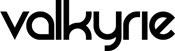

# Description
1. Please train a machine learning model using the data set attached. In the data set, y column is the target variable, X columns are the features and each row is an observation.
2. Please comment on your findings on data patterns, data processing procedure, modeling approach, and evaluation of model performance and any other outputs clearly. Please fill in your comments in the "comment" cell for each section.
3. Return a **reproducible notebook containing your code in Python (no Matlab or R please)**. Your **modeling process together with your comments and thought process** will be evaluated by our team members.
4. **If you have copied code from public websites, please provide the url links.**
5. We expect the project to be completed in **three hours or less**. Please return your code to our recruiting team after you finish.

# 1. Import any modules as you need

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.random.seed(42)  # random seed (no need to change)

# 2. Read input data

In [2]:
df = pd.read_csv(r"interview_train.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,49.359178,-21.626783,0.829029,10.305796,14.607746,0.524993,8.373217,1.2,NaN,25.851422,-0.002612,-10.337725,1.607982,0.550908,0.666995,0
1,55.649128,-20.337816,8.870142,7.548730,14.523496,-0.042865,9.662184,1.2,-2.380146,26.037642,0.216839,-9.582749,-1.438016,0.024510,0.027207,0
2,58.116093,-18.346651,9.974673,9.716283,18.677543,NaN,11.653349,1.2,NaN,26.445252,-0.967697,-8.306297,-2.954746,240.274511,0.441496,0
3,43.452196,-24.003563,9.772460,11.938981,13.110701,2.222492,5.996437,1.2,NaN,23.760152,1.282298,-10.742232,-0.439987,1.818539,10.968514,0
4,56.175669,-19.596168,0.022057,5.993732,13.447700,-1.228364,10.403832,1.2,0.416888,24.844529,0.253979,-9.019813,0.417531,0.415434,0.248882,0


# 3. Investigate data set

In [3]:
# identify any patterns in the data set
# shape of the data 
df.shape

(1000, 16)

In [4]:
# check each column of the data and find out if there is missing value
df.isnull().sum()

x1       0
x2       0
x3       0
x4       0
x5       0
x6      63
x7       0
x8       0
x9     735
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
y        0
dtype: int64

In [5]:
# a rough description of the data
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,937.000000,1000.000000,1000.000000,265.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.517565,-20.851878,4.505483,10.135499,15.628357,0.026360,9.705899,1.366400,-0.144570,25.211977,0.042767,-9.285574,-0.017289,17.443912,7.270655,0.196000
std,6.087587,2.061504,3.302112,2.460661,2.407766,1.015658,3.944052,0.324864,1.060027,1.025042,1.332249,1.058924,1.753340,94.626185,26.694453,0.397167
min,26.710894,-28.272436,0.000397,1.616155,7.990298,-2.953311,1.727564,1.200000,-3.563742,21.796244,-8.385010,-12.779049,-11.252886,-3.160771,0.001730,0.000000
25%,47.323781,-22.233204,1.302855,8.415903,14.049763,-0.698778,7.793266,1.200000,-0.883971,24.516931,-0.681076,-10.055449,-0.768527,-0.585010,0.272807,0.000000
50%,51.534083,-20.938182,3.963569,10.193280,15.685558,0.029249,9.108405,1.200000,-0.154200,25.255875,0.013754,-9.286343,-0.053903,0.062795,1.031271,0.000000
75%,55.704990,-19.403270,7.554787,11.796511,17.255240,0.698049,10.714338,1.200000,0.582374,25.902240,0.719454,-8.557730,0.734428,0.820630,3.917249,0.000000
max,70.136975,-14.098655,9.999913,19.235922,23.097506,3.814090,30.000000,2.000000,2.768734,28.199311,9.331303,-5.890481,18.359024,1020.739438,412.761211,1.000000


x1


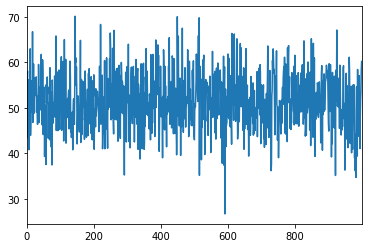

x2


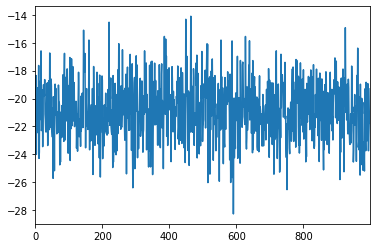

x3


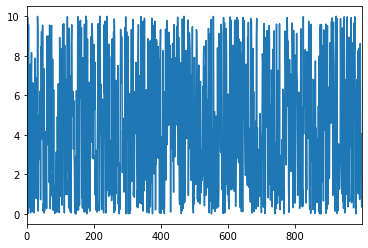

x4


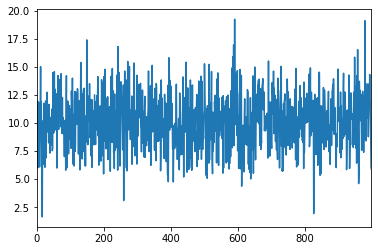

x5


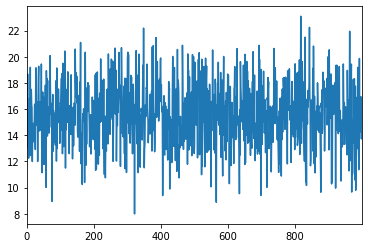

x6


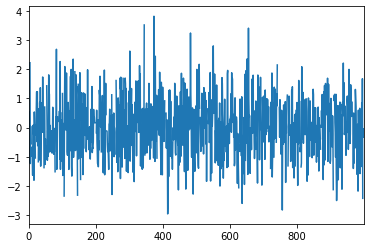

x7


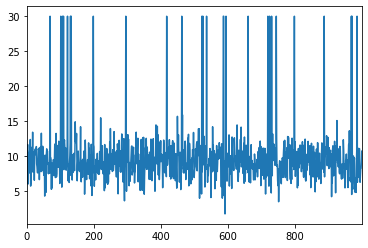

x8


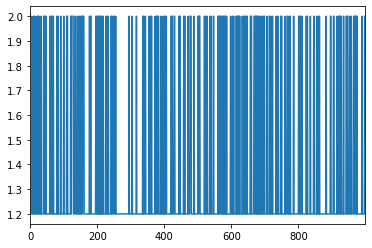

x9


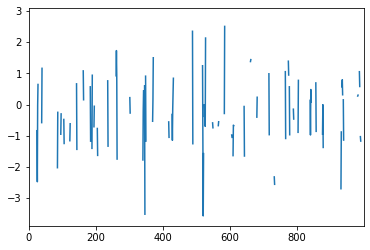

x10


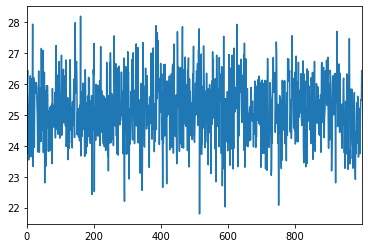

x11


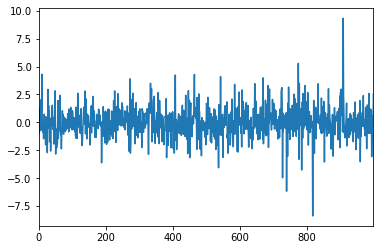

x12


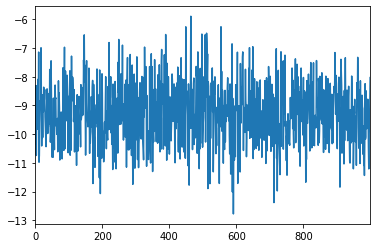

x13


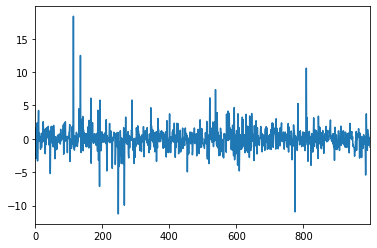

x14


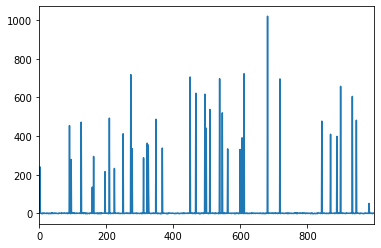

x15


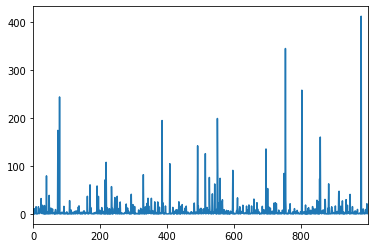

y


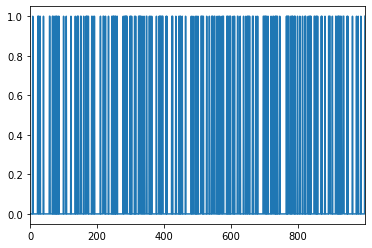

In [6]:
for name in df.columns:
    print(name)
    df[name].plot()
    plt.show()

In [7]:
# the distinct values in x8
print("the distinct value in the x8 column", set(df["x8"]))
print("the distinct value in the y column", set(df["y"]))

the distinct value in the x8 column {1.2, 2.0}
the distinct value in the y column {0, 1}


In [8]:
# for y the number of 0 and number of 1
print("the number of 0: ", np.sum(df["y"] == 0))
print("the number of 1: ",np.sum(df["y"] == 1))

the number of 0:  804
the number of 1:  196


### comment your findings in section 3

* Shape of the dataset is (1000, 16), then we have 1000 observations and 16 variables.  
* Check the values in the dataset and find out there are 63 missing values in x6 column and 735 missing value in x9 column. 
* For column x8 we have only 2 distinct value and column y takes binary values and while other colums take continuous values. And for those columns which take continuous value, the column x14 and x15 and x7 seem to have some special properties or cut off in values and maybe should be considered more carefully, other columns look awfully like some time series data for stock return. 

# 4. Process data set

In [9]:
from sklearn import preprocessing
# clean/process the data as needed
# the missing value we have are column x6 and column x9
# for x6 we have 63 missing values so I choose to use 
df["x6"] = df["x6"].interpolate()
df_dropX9 = df.drop(["x9"], axis=1)
df_x = df_dropX9.drop(["y"], axis=1)
df_Y = df[["y"]]
xNames = df_x.columns
# normalize the values in df_x
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_x.values)
df_X = pd.DataFrame(x_scaled)
df_X.columns = xNames
print("Independent variable shape: ", df_X.shape)
print("Dependent variable shape", df_Y.shape)
X = df_X.values
Y = df_Y.values.flatten()

Independent variable shape:  (1000, 14)
Dependent variable shape (1000, 1)


In [10]:
df[df_X["x8"] == 1].shape

(208, 16)

In [11]:
df[df_X["x8"] == 0].shape

(792, 16)

In [12]:
from sklearn.model_selection import train_test_split
# split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("size of training set: ", len(y_train))
print("size of testing set: ", len(y_test))

size of training set:  900
size of testing set:  100


### explain why you choose to process the data in certain way

* For column x6 there are only 63 data point missing, so I choose to use linear interpolation to fill out those missing data. 
* But for column x9, there are over 700 missing values, compared with size of the observation 1000, there is no reason we should keep this column. Trying to fit the time series data in column x9 is costly and also add in another layer of bias to the model, because we need to make assumption about x9 and how this variable evolve through time. So I just choose to drop the data. 
* For the speacial treatment of column x14 and x15 and x7, I choose not to worried about it for now, since this should be a more detailed work and probably needs more information about the data and understand what it stands for. 
* Finally I need to normalize the X, the goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values.

# 5. Build your machine learning model

In [13]:
# build your machine learning model here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [14]:
# try logistic regression model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [15]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [16]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### explain why you choose certain models vs others

1. It's is a very simple model to start with.
2. The dependent variable is takes binary value.    
3. Logistic regression could also provide the probabiliy of an outcome. 

# 6. Model evaluation

In [17]:
from sklearn.model_selection import cross_val_score
# show your model performance here
cross_val_score = cross_val_score(clf, X, Y, cv=10)
print("The prediction accuracy for each cross validation: ", cross_val_score)
print("The mean score is: ", np.mean(cross_val_score))

The prediction accuracy for each cross validation:  [0.8  0.83 0.85 0.82 0.84 0.81 0.81 0.81 0.8  0.81]
The mean score is:  0.818


### comment on your model performance and discuss how you would improve the model given the performance

* The model performance is acutually very bad, because for y the dependent variable: 80% of the data points take the value of 0, so if one give a prediction of a test data all 0 value, he will easily get a accuracy of 80%. 

# 7. Final comments

### place your final comments and additional thoughts here

### Experiement on Auto Machine Learning platform:  autoML classifier. (http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#code-examples)

In [18]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
# Import a sample binary outcome train/test set into H2O
data = h2o.import_file("interview_train.csv")
train,test,valid = data.split_frame(ratios=[0.8,0.1])
# Identify predictors and response
x = train.columns
y = "y"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.1" 2019-10-15; Java(TM) SE Runtime Environment (build 13.0.1+9); Java HotSpot(TM) 64-Bit Server VM (build 13.0.1+9, mixed mode, sharing)
  Starting server from /Users/lee/opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/7k/gdsngx6935n6y7yswfg1n6x80000gn/T/tmpl1v0htdm
  JVM stdout: /var/folders/7k/gdsngx6935n6y7yswfg1n6x80000gn/T/tmpl1v0htdm/h2o_lee_started_from_python.out
  JVM stderr: /var/folders/7k/gdsngx6935n6y7yswfg1n6x80000gn/T/tmpl1v0htdm/h2o_lee_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_lee_ek9etb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20200914_174519,0.861581,0.355633,0.599091,0.214893,0.339258,0.115096
XGBoost_grid__1_AutoML_20200914_174519_model_3,0.859056,0.360805,0.597611,0.232144,0.339276,0.115108
GBM_grid__1_AutoML_20200914_174519_model_2,0.854478,0.362485,0.587787,0.211039,0.342993,0.117644
XGBoost_3_AutoML_20200914_174519,0.851462,0.380256,0.603098,0.2227,0.343381,0.117911
GBM_5_AutoML_20200914_174519,0.851001,0.361517,0.592573,0.220453,0.340893,0.116208
XGBoost_grid__1_AutoML_20200914_174519_model_4,0.850088,0.390765,0.580871,0.227501,0.350092,0.122564
XGBoost_1_AutoML_20200914_174519,0.849076,0.376048,0.591836,0.225185,0.343688,0.118122
StackedEnsemble_BestOfFamily_AutoML_20200914_174519,0.847886,0.370815,0.612489,0.219635,0.343143,0.117747
StackedEnsemble_AllModels_AutoML_20200914_174519,0.846319,0.366584,0.625231,0.226742,0.339611,0.115336
GBM_2_AutoML_20200914_174519,0.845619,0.388123,0.560014,0.237664,0.353839,0.125202


##### There should be a lot of more that could be done:
1. According to the value of x8, the dataset could be divided into two part and be treated separately. 
2. My work here is really applying the packages at hand and do not really consider the detail parameters that needs to be adjusted.
3. A lot of more model could be used here to compare the performance between models.
4. If more information could be given to the data, we could probably fit the x9 column instead of dropping it. 
5. If these data are all time series data then more information could be added into the model. And it's very likely that if these data are stock return, so some of them might be highly correlated, so this could be fixed by using some dimension reduction techniques such as PCA to transform the variables into less correlated variables.
6. Some of the variable should be treated seperately such as x9, x14 and x15, since there seem to be some cut off in value that might due to the fact that they are censored data.